<a href="https://colab.research.google.com/github/dokin0802/SinGAN/blob/master/augf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

N_EPOCHS = 50
N_BATCH = 20

learning_rate = 0.001
dropout_rate = 0.5

np.random.seed(1)
tf.random.set_seed(1)


def create_model():
    model = keras.Sequential()
    model.add(layers.Conv2D(64, kernel_size=3, padding="SAME", activation='relu', 
                            input_shape=(150,150,3)))
    model.add(layers.MaxPool2D(padding='SAME'))

    model.add(layers.Conv2D(64, kernel_size=3, padding="SAME", activation='relu'))
    model.add(layers.MaxPool2D(padding='SAME'))

    model.add(layers.Conv2D(128, kernel_size=3, padding="SAME", activation='relu'))
    model.add(layers.MaxPool2D(padding='SAME'))

    model.add(layers.Conv2D(128, kernel_size=3, padding="SAME", activation='relu'))
    model.add(layers.MaxPool2D(padding='SAME'))

    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [3]:
train_dir = '/content/gdrive/MyDrive/architecture_aug/augf1'
validation_dir = '/content/gdrive/MyDrive/architecture_aug/augv1'
test_dir = '/content/gdrive/MyDrive/architecture_small/test'

In [6]:
import shutil
def split(img_list, val_count, train_path, val_path):
  val_files=[]
  for i in random.sample(img_list, val_count):
    val_files.append(i)
  
  train_files = [x for x in img_list if x not in val_files]

  for k in train_files:
    shutil.copy(k,train_path)
  for c in val_files:
    shutil.copy(c,val_path)

In [ ]:
import os
import glob
import random

g_train_path= '/content/gdrive/MyDrive/architecture_aug/train/g'
r_train_path= '/content/gdrive/MyDrive/architecture_aug/train/r'
g_val_path= '/content/gdrive/MyDrive/architecture_aug/val/g'
r_val_path= '/content/gdrive/MyDrive/architecture_aug/val/r'

split(glob.glob('/content/gdrive/MyDrive/architecture_aug/org/g/*'), 50, g_train_path,g_val_path)
split(glob.glob('/content/gdrive/MyDrive/architecture_aug/org/r/*'), 50, r_train_path,r_val_path)

In [ ]:
len(os.listdir(os.path.join(os.path.join('/content/gdrive/MyDrive/architecture_aug/val/g'))))

50

In [ ]:
import os
import glob
path = '/content/gdrive/MyDrive/architecture_aug/train'
g = glob.glob(path+'/g'+'/*')
r = glob.glob(path+'/r'+'/*')

def rename(files):
  if 'g' in files[0]:
    for i,f in enumerate(files):
      os.rename(f, os.path.join(path+"/g", 'g_' + '{0:03d}.jpg'.format(i)))
    g = glob.glob(path+'/g'+'/*')
  
  elif 'r' in files[0]:
    for i,f in enumerate(files):
      os.rename(f, os.path.join(path+"/r", 'r_' + '{0:03d}.jpg'.format(i)))
    r = glob.glob(path+'/r'+'/*')

In [ ]:
rename(g)
rename(r)

FileNotFoundError: ignored

FileNotFoundError: ignored

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1/255) 
test_datagen =  ImageDataGenerator(rescale=1/255) 

In [5]:
train_generator = train_datagen.flow_from_directory(
                                    train_dir, 
                                    target_size=(150,150), 
                                    class_mode='binary',
                                    batch_size=N_BATCH   
                                )

validation_generator = test_datagen.flow_from_directory(
                                    validation_dir,
                                    target_size=(150,150), 
                                    class_mode='binary', 
                                    batch_size=N_BATCH   
                                )
# Test Set
test_generator = test_datagen.flow_from_directory(
                                    test_dir, 
                                    target_size=(150,150), 
                                    class_mode='binary', 
                                    batch_size=N_BATCH  
                                )

Found 204 images belonging to 2 classes.
Found 51 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
train_generator.class_indices # {'g': 0, 'dogs': 1}


len(train_generator), len(validation_generator), len(test_generator) # (100, 50, 50)


batch = train_generator.next() #2

len(batch), type(batch) #(2, tuple)

type(batch[0]), batch[0].shape # (numpy.ndarray, (20, 150, 150, 3))

(numpy.ndarray, (20, 150, 150, 3))

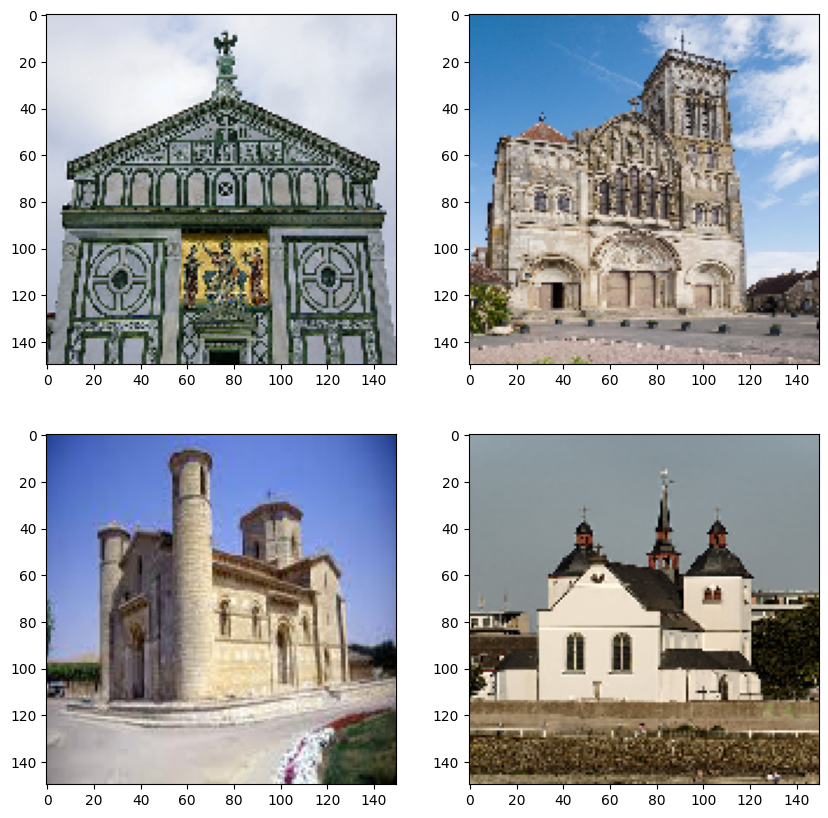

In [7]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(batch[0][i])
plt.show()   

In [8]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss='binary_crossentropy',  
              metrics=['accuracy'])


history= model.fit(train_generator, 
                    epochs=N_EPOCHS,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator, 
                    validation_steps = len(validation_generator)
                    )
     

Epoch 1/50
11/11 [==============================] - 33s 2s/step - loss: 0.2439 - accuracy: 0.9657 - val_loss: 0.1003 - val_accuracy: 0.9804
Epoch 2/50
11/11 [==============================] - 2s 188ms/step - loss: 0.1045 - accuracy: 0.9804 - val_loss: 0.1028 - val_accuracy: 0.9804
Epoch 3/50
11/11 [==============================] - 2s 190ms/step - loss: 0.1646 - accuracy: 0.9804 - val_loss: 0.1419 - val_accuracy: 0.9804
Epoch 4/50
11/11 [==============================] - 2s 189ms/step - loss: 0.1325 - accuracy: 0.9804 - val_loss: 0.3006 - val_accuracy: 0.9804
Epoch 5/50
11/11 [==============================] - 2s 188ms/step - loss: 0.4375 - accuracy: 0.9804 - val_loss: 0.1154 - val_accuracy: 0.9804
Epoch 6/50
11/11 [==============================] - 2s 187ms/step - loss: 0.1683 - accuracy: 0.9804 - val_loss: 0.1409 - val_accuracy: 0.9804
Epoch 7/50
11/11 [==============================] - 2s 188ms/step - loss: 0.1316 - accuracy: 0.9804 - val_loss: 0.1002 - val_accuracy: 0.9804
Epoch 8/

In [ ]:
from keras.models import load_model
model.save('/content/gdrive/My Drive/archi_0.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/My Drive/archi_0.h5')
model.summary()

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

KeyError: ignored

In [10]:
model.evaluate(test_generator)

5/5 [==============================] - 32s 8s/step - loss: 4.8750 - accuracy: 0.5000


[4.874985218048096, 0.5]

In [11]:

train_gen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range= 40,
    width_shift_range=0.2, #[-0.2, 0, +0.2]  ex)[-1, -0.5, 0, 0.5, 1]
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1/255) 

In [12]:
train_generator = train_gen.flow_from_directory(train_dir,
                                                target_size=(150,150),
                                                class_mode='binary',
                                                batch_size=N_BATCH)

validation_generator = test_gen.flow_from_directory(validation_dir,
                                                target_size=(150,150),
                                                class_mode='binary',
                                                batch_size=N_BATCH)

test_generator = test_gen.flow_from_directory(test_dir,
                                                target_size=(150,150),
                                                class_mode='binary',
                                                batch_size=N_BATCH)

Found 204 images belonging to 2 classes.
Found 51 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [13]:
model.evaluate(train_generator)


11/11 [==============================] - 3s 227ms/step - loss: 0.1736 - accuracy: 0.9804


[0.173562690615654, 0.9803921580314636]

/content/gdrive/MyDrive/architecture_aug/augf1/g/g (200).jpg


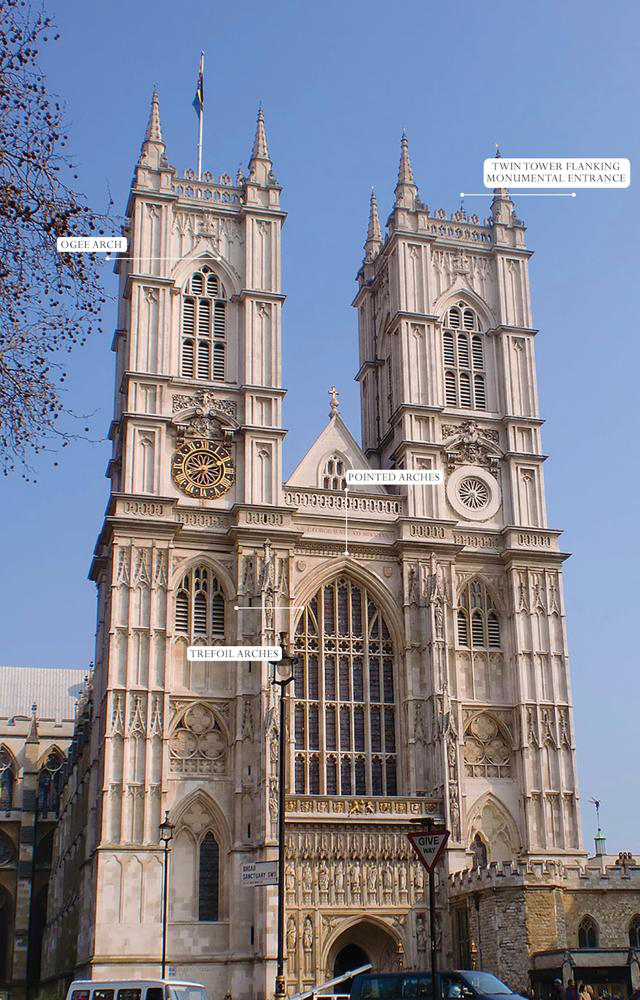

In [14]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_path = os.path.join(train_dir, 'g', 'g (200).jpg')
print(image_path)

img = load_img(image_path)
img

In [15]:
x = img_to_array(img)
x = x[np.newaxis, ...]
x.shape 

(1, 1000, 640, 3)

In [16]:
train_gen2 = ImageDataGenerator(
    # rescale = 1/255,
    rotation_range= 40,
    width_shift_range=0.2, #[-0.2, 0, +0.2]  ex)[-1, -0.5, 0, 0.5, 1]
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

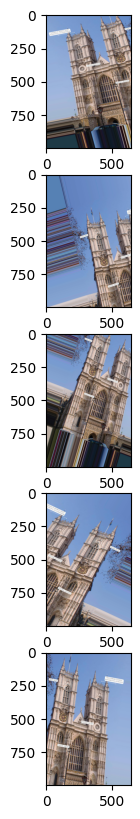

In [17]:
gen = train_gen2.flow(x, batch_size=1) 
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5, 1, i+1)
    batch = gen.next()
    img = batch[0].astype('uint8')
    plt.imshow(img)
plt.show()

In [18]:

model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 19, 19, 128)     

In [19]:
history=model.fit(train_generator,
                epochs=N_EPOCHS,
                steps_per_epoch=len(train_generator),
                validation_data = validation_generator,
                validation_steps=len(validation_generator))

Epoch 1/50
11/11 [==============================] - 5s 280ms/step - loss: 0.2161 - accuracy: 0.9510 - val_loss: 0.0994 - val_accuracy: 0.9804
Epoch 2/50
11/11 [==============================] - 3s 270ms/step - loss: 0.1040 - accuracy: 0.9804 - val_loss: 0.2482 - val_accuracy: 0.9804
Epoch 3/50
11/11 [==============================] - 3s 269ms/step - loss: 0.2885 - accuracy: 0.9804 - val_loss: 0.1450 - val_accuracy: 0.9804
Epoch 4/50
11/11 [==============================] - 3s 267ms/step - loss: 0.1115 - accuracy: 0.9804 - val_loss: 0.1149 - val_accuracy: 0.9804
Epoch 5/50
11/11 [==============================] - 3s 266ms/step - loss: 0.1278 - accuracy: 0.9804 - val_loss: 0.1047 - val_accuracy: 0.9804
Epoch 6/50
11/11 [==============================] - 3s 269ms/step - loss: 0.1094 - accuracy: 0.9804 - val_loss: 0.0991 - val_accuracy: 0.9804
Epoch 7/50
11/11 [==============================] - 3s 266ms/step - loss: 0.1137 - accuracy: 0.9804 - val_loss: 0.1029 - val_accuracy: 0.9804
Epoch 

In [20]:
model.evaluate(test_generator) 


5/5 [==============================] - 2s 360ms/step - loss: 2.3373 - accuracy: 0.5000


[2.3372864723205566, 0.5]